<a href="https://colab.research.google.com/github/Mohanrasu/Mnist_Machine-Learning/blob/master/MNIST_handwritten_digits(784_dim).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import time
import cv2

Using TensorFlow backend.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
#dataset downoaded from tensorflow library
mnist= input_data.read_data_sets('MNIST_data/')


W0617 05:10:43.668547 140099662190464 deprecation.py:323] From <ipython-input-3-cf1e9fa4e10c>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0617 05:10:43.669972 140099662190464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0617 05:10:43.671366 140099662190464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0617 05:10:44.556216 140099662190464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0617 05:10:44.889721 140099662190464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
x_train=mnist.train.images
y_train=mnist.train.labels
x_validation=mnist.validation.images
x_test=mnist.test.images
y_test=mnist.test.labels
y_validation=mnist.validation.labels

In [47]:
showing shape of image and labels
print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)
print('x_validation:',x_validation.shape)
print('y_validation:',y_validation.shape)

x_train.shape: (55000, 784)
y_train.shape: (55000,)
x_test.shape: (10000, 784)
y_test.shape: (10000,)
x_validation: (5000, 784)
y_validation: (5000,)


In [6]:
#checking dimension of x_train image
x_train[4].shape

(784,)

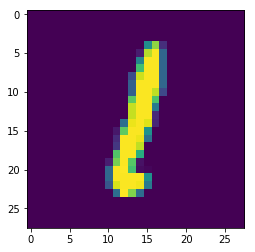

In [92]:
#To show x_train of image 
test_image_show=np.reshape(x_train[6],[28,28])
plt.imshow(test_image_show)

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) 
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(x_train,y_train,epochs = 3 )
predictions = model.predict([x_test])

W0617 05:11:55.350867 140099662190464 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
55000/55000 [==============================] - 4s 75us/sample - loss: 0.3479 - acc: 0.9009
Epoch 2/3
55000/55000 [==============================] - 4s 70us/sample - loss: 0.1496 - acc: 0.9543
Epoch 3/3
55000/55000 [==============================] - 4s 72us/sample - loss: 0.1020 - acc: 0.9682


In [0]:
pred=predictions.argmax(axis=1)

In [45]:
pred[:9],y_test[:9]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8))

In [43]:
predictions_v = model.predict([x_validation])
pred_v=predictions_v.argmax(axis=1)
pred_v[:9],y_validation[:9]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1]),
 array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8))

In [19]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       984
           1       0.99      0.99      0.99      1137
           2       0.97      0.97      0.97      1033
           3       0.98      0.93      0.96      1066
           4       0.98      0.96      0.97       997
           5       0.97      0.96      0.96       901
           6       0.97      0.98      0.97       949
           7       0.96      0.97      0.97      1019
           8       0.94      0.98      0.96       935
           9       0.95      0.97      0.96       979

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [42]:
print(classification_report(pred_v,y_validation))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       482
           1       0.98      0.99      0.98       561
           2       0.99      0.94      0.96       512
           3       0.98      0.89      0.93       541
           4       0.96      0.99      0.97       517
           5       0.93      0.99      0.96       408
           6       0.98      0.98      0.98       504
           7       0.96      0.98      0.97       541
           8       0.94      0.98      0.96       447
           9       0.96      0.97      0.96       487

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

